**Introduction: Predicting UPDRS Motor Score Using Multi-Modal: Initial Model Exploration**

**Experiment 1:**

In this experiment, we aim to predict the UPDRS motor score (NP3TOT) using a preprocessed dataset that includes structural MRI measurements, DAT-SPECT data, APOE4 genotype, and demographic information (AGE, SEX). This dataset has already undergone cleaning and imputation in a previous preprocessing step.

We begin by establishing a baseline using a Linear Regression model. Subsequently, we implement a Random Forest Regressor to explore its ability to capture potential non-linear relationships within the data and improve predictive performance.

Evaluation of both models focuses on standard regression metrics including Mean Absolute Error (MAE), Mean Squared Error (MSE), and R².

**Findings:**

The initial Linear Regression model demonstrated poor performance in predicting the UPDRS motor score. The Random Forest Regressor, however, showed a substantial improvement in performance compared to the Linear Regression model, indicating its greater capability in handling the complexity of this multi-modal dataset for this prediction task.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Load the preprocessed dataset
df = pd.read_csv("final_df_cleaned.csv")

In [3]:
# Display the first few rows of the dataframe to understand the data structure
df.head()

,PATNO,SEX,AGE,Brain_Stem,Right_choroid_plexus,Right_Cerebellum_White_Matter,Left_Cerebellum_Cortex,Left_choroid_plexus,Left_Pallidum,Left_Thalamus,...,Putamen_Total,Caudate_Total,Putamen_Asym,Caudate_Asym,CortexVol_norm,TotalGrayVol_norm,Hippocampus_Total_norm,Amygdala_Total_norm,Caudate_Total_norm,Putamen_Total_norm
0,3000.0,0.0,69.1,20725.6,537.7,11125.5,54840.0,747.9,1765.6,6955.3,...,5.57,6.42,-0.055655,0.068536,0.276552,0.380586,0.005046,0.001680,0.003801,0.005288
1,3001.0,1.0,65.1,23802.3,633.1,16515.1,59127.2,716.5,2268.1,7746.8,...,1.45,3.92,-0.103448,-0.020408,0.268779,0.378124,0.005145,0.002145,0.006034,0.007797
2,3002.0,0.0,67.6,19271.1,592.4,11807.5,52148.3,495.2,1913.5,6805.1,...,2.79,6.64,0.275986,0.120482,0.299985,0.419209,0.005184,0.002046,0.005387,0.007759
3,3003.0,0.0,56.6,22191.0,623.8,15223.8,56613.4,682.2,2092.5,7451.9,...,1.79,6.17,-0.240223,-0.176661,0.277726,0.388823,0.005995,0.002064,0.004245,0.006880
4,3004.0,1.0,59.3,24473.0,420.0,14517.1,50758.6,358.6,1393.8,8138.2,...,6.51,10.39,-0.087558,0.020212,0.284486,0.382852,0.005141,0.002137,0.003922,0.006585


In [4]:
# Get a list of all column names in the dataframe
df.columns.to_list()

['PATNO',
 'SEX',
 'AGE',
 'Brain_Stem',
 'Right_choroid_plexus',
 'Right_Cerebellum_White_Matter',
 'Left_Cerebellum_Cortex',
 'Left_choroid_plexus',
 'Left_Pallidum',
 'Left_Thalamus',
 'Right_VentralDC',
 'rhCortexVol',
 'Right_Pallidum',
 'lhCortexVol',
 'Left_Accumbens_area',
 'Right_Cerebellum_Cortex',
 'rhCerebralWhiteMatterVol',
 'Right_Accumbens_area',
 'lhCerebralWhiteMatterVol',
 'Left_Cerebellum_White_Matter',
 'Left_VentralDC',
 'SubCortGrayVol',
 'Right_Thalamus',
 'CSF',
 'CerebralWhiteMatterVol',
 'EVENT_ID_y',
 'lh_bankssts',
 'lh_caudalanteriorcingulate',
 'lh_caudalmiddlefrontal',
 'lh_cuneus',
 'lh_entorhinal',
 'lh_fusiform',
 'lh_inferiorparietal',
 'lh_inferiortemporal',
 'lh_isthmuscingulate',
 'lh_lateraloccipital',
 'lh_lateralorbitofrontal',
 'lh_lingual',
 'lh_medialorbitofrontal',
 'lh_middletemporal',
 'lh_parahippocampal',
 'lh_paracentral',
 'lh_parsopercularis',
 'lh_parsorbitalis',
 'lh_parstriangularis',
 'lh_pericalcarine',
 'lh_postcentral',
 'lh_po

In [5]:
# Define columns to drop based on the problem description or previous analysis
drop_cols = ['PATNO', 'EVENT_ID_y', 'Putamen_Total', 'Caudate_Total', 'NHY']
# Drop the specified columns from the dataframe
df = df.drop(columns=drop_cols)

In [6]:
# Define features (X) and target variable (y)
# X contains all columns except 'NP3TOT'
X = df.drop(columns=['NP3TOT'])
# y is the target variable 'NP3TOT' (UPDRS motor score)
y = df['NP3TOT']

In [7]:
# Check for any remaining missing values in the features and target
print(X.isnull().sum().sum(), "missing values in X")
print(y.isnull().sum(), "missing values in y")

0 missing values in X
0 missing values in y


In [8]:
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

In [9]:
# Import train_test_split for splitting the data
from sklearn.model_selection import train_test_split

# Split the scaled data into training and testing sets
# 80% for training, 20% for testing, with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# Import LinearRegression model and evaluation metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()
# Train the Linear Regression model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using MAE, MSE, and R²
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 9.745758239113865
MSE: 142.86217436770977
R2: 0.03526758922116524


In [11]:
# Calculate the absolute values of the coefficients to understand feature importance
importances = pd.Series(model.coef_, index=X.columns).abs().sort_values(ascending=False)

In [12]:
# Display the feature importances for the Linear Regression model
importances

,0
CerebralWhiteMatterVol,7042.274851
rhCerebralWhiteMatterVol,3549.501349
lhCerebralWhiteMatterVol,3506.138554
CortexVol_norm,19.716207
TotalGrayVol_norm,16.252266
...,...
lh_lateralorbitofrontal,0.042729
SEX,0.029302
Right_VentralDC,0.008252
Right_Thalamus,0.003046


**RandomForest**

In [13]:
# Import necessary libraries for Random Forest model and visualization
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # Already imported, but good to keep with model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Already imported
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Define features and target - This step is repeated, can be removed if previous cells are run
# Define features and target
X = df.drop(columns=['NP3TOT'])
y = df['NP3TOT']

# Split data - This step is repeated, can be removed if previous cells are run
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# Initialize the Random Forest Regressor model
# n_estimators is the number of trees in the forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the Random Forest model on the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Make predictions on the test data using the Random Forest model
y_pred = rf.predict(X_test)

# Calculate evaluation metrics for the Random Forest model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 7.72
MSE: 104.78
R²: 0.2924


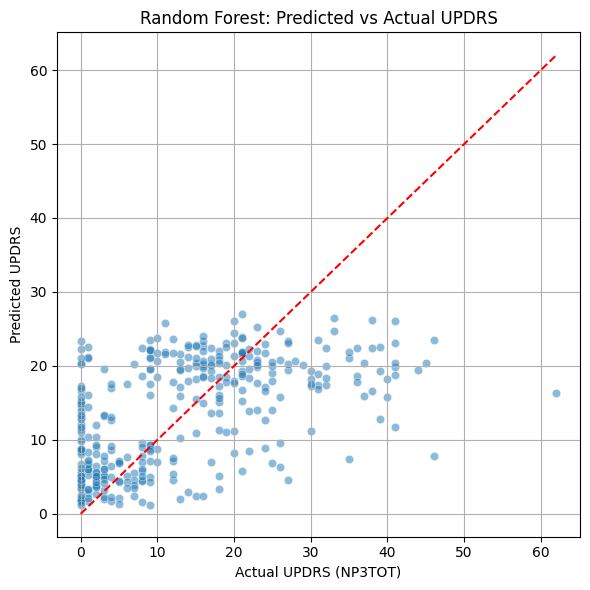

In [17]:
# Create a scatter plot to visualize predicted vs actual UPDRS scores for Random Forest
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
# Add a diagonal line representing perfect prediction
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual UPDRS (NP3TOT)")
plt.ylabel("Predicted UPDRS")
plt.title("Random Forest: Predicted vs Actual UPDRS")
plt.grid(True)
plt.tight_layout()
plt.show()